<a href="https://colab.research.google.com/github/alaasalmo/CodeDeployGitHubDemo/blob/master/CIND840_Lab_1_Questions-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIND840 Practical Approaches in Machine Learning
# Lab 1

## Preparation

Download the CIND840 Lab 1 movies.csv from course shell and upload to GCP.

In [1]:
# If you are using Google Colab then upload the data file
from google.colab import files
files.upload()
!ls                       # list files to check if movies.csv is there

Saving movies.csv to movies.csv
movies.csv  sample_data


In [3]:
# Import relevant libraries
import numpy as np
import pandas as pd
pd.__version__ # You can check the pandas library version installed on your machine using this property.

'2.2.2'

# Questions
1. Load the movies.csv as Pandas DataFrame and obtain information about columns, datatypes and memory footprint. Then compute summary statistics for numeric columns. Detect any duplicated rows in the DataFrame and remove them. [Hint: read_csv()]
2. Filter the movies (title, runtime) longer than 1000 minutes and shorter than 2100 minutes. [Hint: df[ (df.col >= X) & (df.col2 <= Y)]]
3. Find the title, vote_count and release_date of top 10 most popular movies with respcet to the vote_count discarding NaN values. [Hint: isnull(), reset_index(), sort_values()]
4. Count the number of movies released in each year and plot the counts with year on x-axis and count of movies released in a given year on y-axis. [Hint: pd.to_datetime(), count_values(), sort_index()]
5. Apply random sampling and split the movies dataframe into 70% training set and 30% test set. [Hint: sample()]

This is the end of Lab 1

Ceni Babaoglu, PhD

The Chang School of Continuing Education

Ryerson University

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# It will return a dictionary of uploaded files
# Get the filename
filename = list(uploaded.keys())[0]


Saving movies.csv to movies.csv


In [4]:
df=pd.read_csv('movies.csv')
print(df.info(memory_usage=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

/tmp/ipython-input-2325252001.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies.csv')


In [6]:
duplicates = df.duplicated()
print(duplicates)  # Number of duplicated rows

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Length: 45466, dtype: bool


In [8]:
df2=df.dropna()

In [10]:
# Convert columns to numeric, invalid parsing becomes NaN
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')
df2['runtime'] = pd.to_numeric(df2['runtime'], errors='coerce')

# Now filter
df2_filtered = df2[(df2['budget'] >= 1000) & (df2['runtime'] <= 1000)]
df2_filtered.head()

/tmp/ipython-input-2999118753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')
/tmp/ipython-input-2999118753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['runtime'] = pd.to_numeric(df2['runtime'], errors='coerce')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


In [5]:
df2 = df.drop_duplicates()
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Length: 45466, dtype: bool


In [ ]:
# Make sure vote_count is numeric
df2['vote_count'] = pd.to_numeric(df2['vote_count'], errors='coerce')

# Drop rows where vote_count is NaN
df_clean = df2.dropna(subset=['vote_count'])

# Select relevant columns and sort by vote_count descending
top10_movies = df_clean[['title', 'vote_count', 'release_date']].sort_values(
    by='vote_count', ascending=False
).head(10)

top10_movies

/tmp/ipython-input-290975027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vote_count'] = pd.to_numeric(df2['vote_count'], errors='coerce')


,title,vote_count,release_date
15480,Inception,14075.0,2010-07-14
12481,The Dark Knight,12269.0,2008-07-16
14551,Avatar,12114.0,2009-12-10
17818,The Avengers,12000.0,2012-04-25
26564,Deadpool,11444.0,2016-02-09
22879,Interstellar,11187.0,2014-11-05
20051,Django Unchained,10297.0,2012-12-25
23753,Guardians of the Galaxy,10014.0,2014-07-30
2843,Fight Club,9678.0,1999-10-15
18244,The Hunger Games,9634.0,2012-03-12


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert release_date to datetime
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')



/tmp/ipython-input-2091176580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')


In [ ]:
df2['release_year'] = df2['release_date'].dt.year
movie_counts = df2['release_year'].value_counts()  # counts by year
movie_counts = movie_counts.sort_index()          # sort by year
movie_counts.head(10)

/tmp/ipython-input-178342999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['release_year'] = df2['release_date'].dt.year


,count
release_year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
1890.0,5
1891.0,6
1892.0,3
1893.0,1


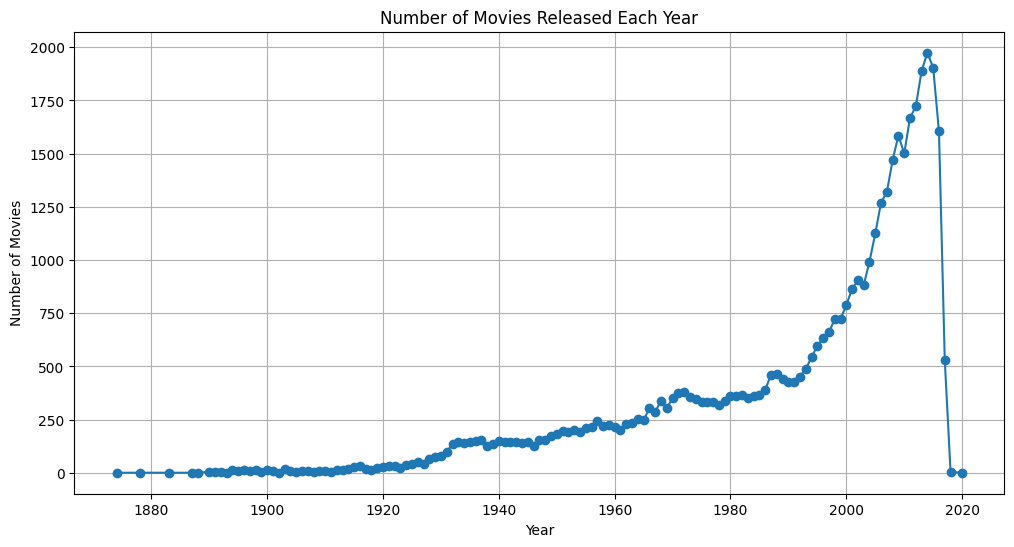

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(movie_counts.index, movie_counts.values, marker='o')
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [ ]:
# Set a random seed for reproducibility
train_df = df2.sample(frac=0.7, random_state=42)  # 70% of the data

# The remaining 30% goes into the test set
test_df = df2.drop(train_df.index)  # drop training rows from the original

print(train_df.count())

adult                    31817
belongs_to_collection     3179
budget                   31815
genres                   31817
homepage                  5409
id                       31817
imdb_id                  31805
original_language        31812
original_title           31817
overview                 31128
popularity               31814
poster_path              31520
production_companies     31815
production_countries     31815
release_date             31746
revenue                  31813
runtime                  31632
spoken_languages         31813
status                   31756
tagline                  14275
title                    31813
video                    31813
vote_average             31813
vote_count               31813
release_year             31746
dtype: int64
31817


In [ ]:
print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 31817
Number of rows in test set: 13636
